# CAPSTONE PROBLEM STATEMENT: Make trading decisions for the stocks selected using ML
Identify all the trading parameters as MA,  bollinger bands, PE, RSI
Create a grid for each stock in the portfolio
Using ML make buying selling decisions


In [23]:
import pandas as pd
import numpy as np

import matplotlib as mp
from matplotlib import pyplot as plt
import seaborn as sns
# Import PdfPages
from matplotlib.backends.backend_pdf import PdfPages


%matplotlib inline

sns.set(style="ticks")

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.stats import zscore


In [51]:
from bokeh.plotting import figure, output_file, show, save
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool, BoxSelectTool #For enabling tools

In [25]:
from datetime import datetime

In [26]:
ap_df = pd.read_csv( 'ap.csv')

In [27]:
ap_df.head(5)

,Date_index,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,...,scll,stcltb,stclta,dr_dowjones,dr_nasdaq,dr_spy,ds,TS_close_pr,pr_cut_stma_b,pr_cut_stma_a
0,2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,...,0,0,0,NaN,NaN,NaN,2015-01-01,790.728536,0,0
1,2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,...,0,0,0,0.00,0.00,0.00,2015-01-02,791.976160,0,0
2,2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,...,0,0,0,-1.86,-1.57,-1.83,2015-01-05,797.020597,0,0
3,2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,...,0,0,0,-0.74,-1.29,-0.89,2015-01-06,800.257020,0,0
4,2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,...,0,0,0,1.23,1.26,1.16,2015-01-07,804.038478,0,0


In [28]:
ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 36 columns):
Date_index       741 non-null object
Date             741 non-null object
Open             741 non-null float64
High             741 non-null float64
Low              741 non-null float64
Close            741 non-null float64
Adj Close        741 non-null float64
Volume           741 non-null int64
NSE              741 non-null float64
NASDAQ           741 non-null float64
DJ               741 non-null float64
SPY              741 non-null float64
pcod             740 non-null float64
hld              741 non-null float64
rsi              0 non-null float64
stma             722 non-null float64
ltma             642 non-null float64
bbsd             722 non-null float64
bbul             722 non-null float64
bbll             722 non-null float64
vwap             741 non-null float64
price_movmnt     740 non-null float64
dr               740 non-null float64
dr_nse           740 non-nu

In [29]:
ap_df.describe()

,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,SPY,...,scul,scll,stcltb,stclta,dr_dowjones,dr_nasdaq,dr_spy,TS_close_pr,pr_cut_stma_b,pr_cut_stma_a
count,741.000000,741.000000,741.000000,741.000000,741.000000,7.410000e+02,741.000000,741.000000,741.000000,741.000000,...,741.000000,741.000000,741.0,741.0,740.000000,740.000000,740.000000,741.000000,741.0,741.0
mean,973.182052,983.369771,961.238597,971.984008,961.471913,1.092231e+06,8660.218556,5392.818504,19102.546530,2202.751863,...,0.051282,0.044534,0.0,0.0,0.047176,0.055757,0.038446,971.646437,0.0,0.0
std,145.896664,146.291954,145.563830,146.112539,150.441794,6.976979e+05,833.669318,674.094261,2147.025397,199.443323,...,0.220721,0.206419,0.0,0.0,0.777098,0.935486,0.794017,143.973979,0.0,0.0
min,700.950012,706.000000,693.000000,698.549988,682.436890,7.026400e+04,6970.600098,4266.839844,15660.179688,1829.079956,...,0.000000,0.000000,0.0,0.0,-3.570000,-4.120000,-3.940000,746.457039,0.0,0.0
25%,851.000000,860.000000,841.000000,850.000000,834.157959,6.742800e+05,8082.399902,4895.790039,17683.580078,2066.659912,...,0.000000,0.000000,0.0,0.0,-0.270000,-0.340000,-0.270000,844.049161,0.0,0.0
50%,940.000000,948.000000,927.599976,936.099976,929.411865,9.185640e+05,8525.599609,5127.520020,18140.439453,2125.770020,...,0.000000,0.000000,0.0,0.0,0.020000,0.055000,0.010000,946.032018,0.0,0.0
75%,1131.500000,1142.800049,1117.099976,1129.650024,1124.507935,1.323475e+06,9150.799805,5880.930176,20810.320313,2365.449951,...,0.000000,0.000000,0.0,0.0,0.412500,0.500000,0.410000,1125.232838,0.0,0.0
max,1262.000000,1262.000000,1249.199951,1256.349976,1253.534668,6.759860e+06,10531.500000,6994.759766,24837.509766,2690.159912,...,1.000000,1.000000,0.0,0.0,3.950000,4.240000,3.900000,1219.805310,0.0,0.0


In [30]:
ap_df.tail(5)

,Date_index,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,...,scll,stcltb,stclta,dr_dowjones,dr_nasdaq,dr_spy,ds,TS_close_pr,pr_cut_stma_b,pr_cut_stma_a
736,2017-12-26,2017-12-26,1142.000000,1155.599976,1140.199951,1150.750000,1150.750000,820589,10531.500000,6936.250000,...,0,0,0,-0.03,-0.34,-0.11,2017-12-26,1140.669522,0,0
737,2017-12-27,2017-12-27,1150.000000,1157.000000,1142.000000,1149.050049,1149.050049,611258,10490.750000,6939.339844,...,0,0,0,0.11,0.04,0.08,2017-12-27,1144.486742,0,0
738,2017-12-28,2017-12-28,1146.000000,1154.349976,1138.349976,1144.400024,1144.400024,536350,10477.900391,6950.160156,...,0,0,0,0.26,0.16,0.18,2017-12-28,1147.585750,0,0
739,2017-12-29,2017-12-29,1145.099976,1172.500000,1142.050049,1158.500000,1158.500000,965848,10530.700195,6903.390137,...,0,0,0,-0.48,-0.67,-0.52,2017-12-29,1149.209635,0,0
740,2018-01-01,2018-01-01,1163.000000,1165.000000,1138.099976,1143.650024,1143.650024,591349,10530.700195,6903.390137,...,0,0,0,0.00,0.00,0.00,2018-01-01,1156.454914,0,0


#  Performing the univariate analysis of the variables:

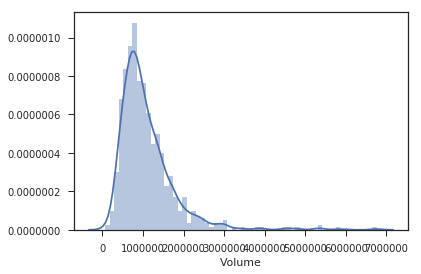

In [31]:
#PLotting the histogram of the features on a grid
sns.distplot(ap_df['Volume'], bins =60)

In [ ]:
# plot the volume against time:

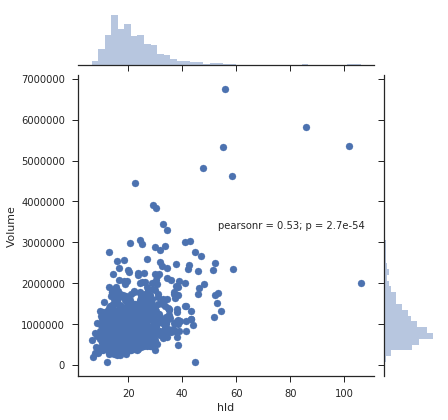

In [32]:
## PLotting the volume against time:
sns.jointplot(x='hld', y='Volume',data = ap_df)

# Performing the correlation analysis between the independent variables and the dependent variables:

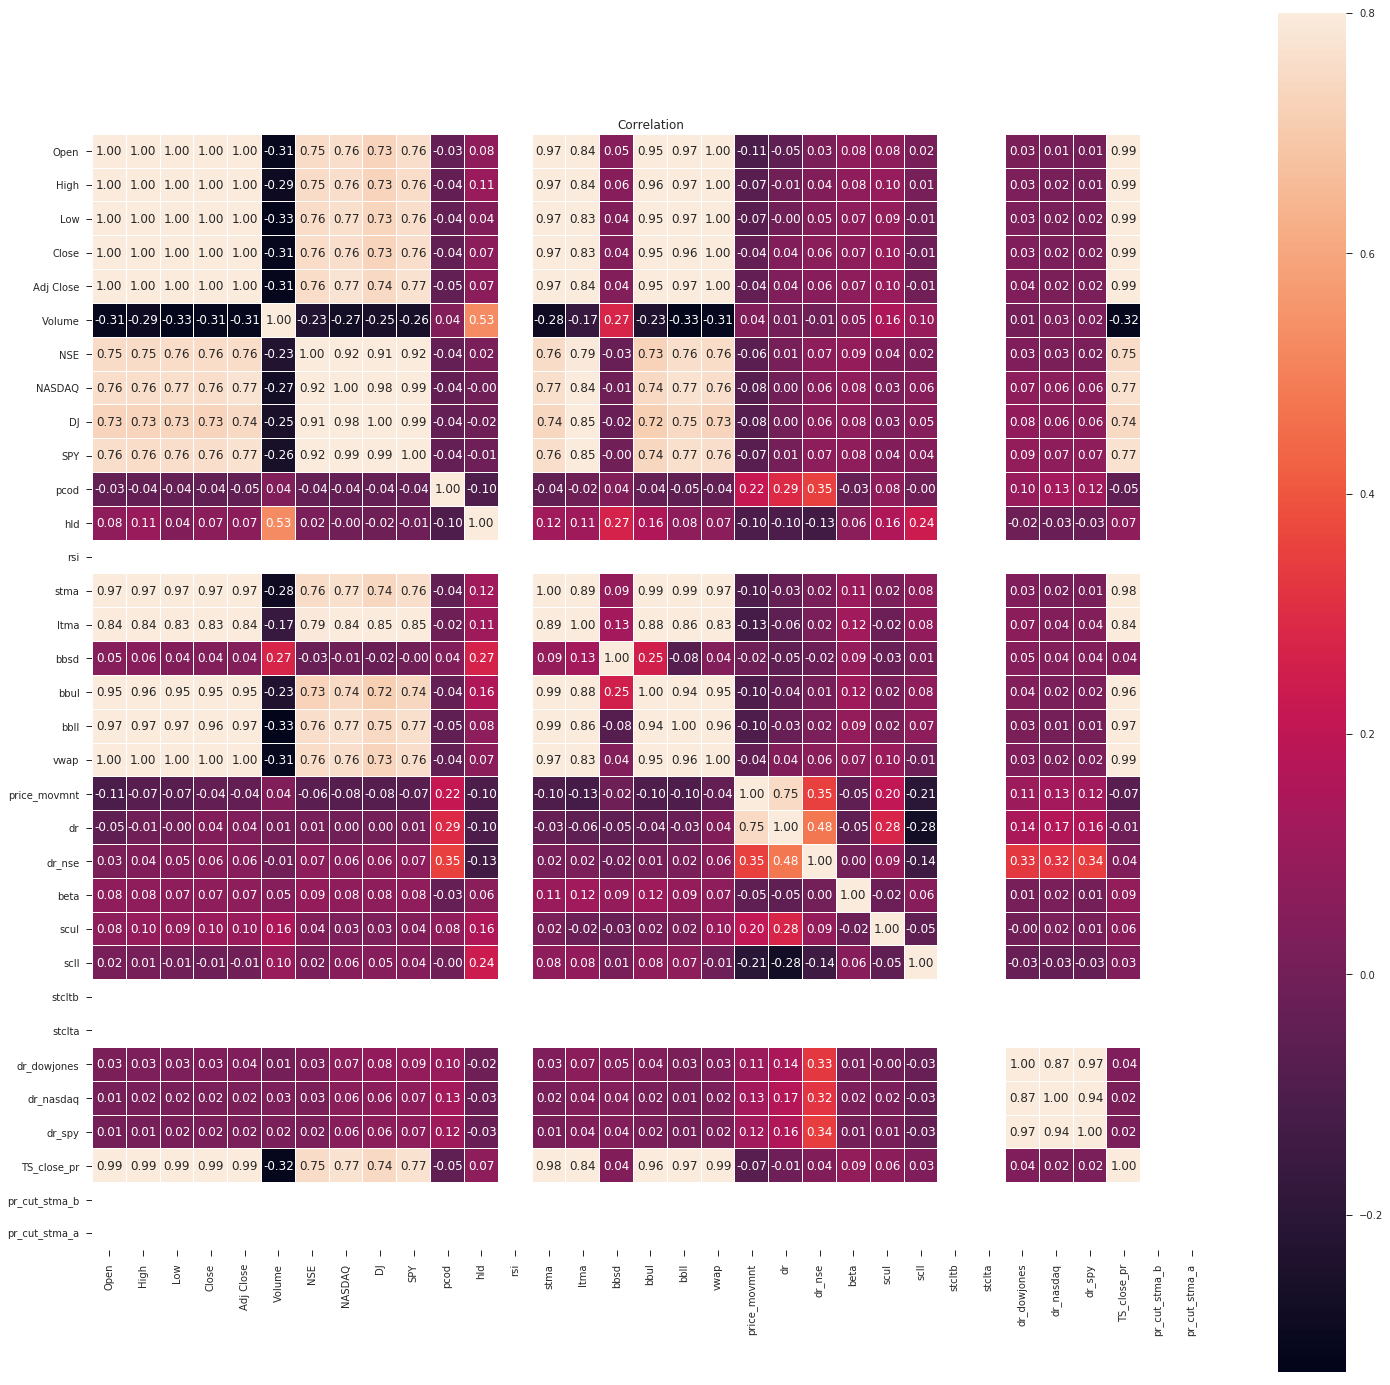

In [33]:
plt.figure(figsize=(25, 25))
ax = sns.heatmap(ap_df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

# Based on the correlation matrix and the heatmap, following variables are highly correlated: open, close, high, low, adj close,  STMA,LTMA, UL, LL and the NIFTY.  Many of these variables show high correlation since they are calculated values based on the same fundamental value.

#  Subsetting the dataframe to remove the highly correlated varaibles and the intermediate variables ( calculations used for the final
# indicators)

In [34]:
#  make a copy of the dataframe.
apsubset_df = pd.DataFrame()
apsubset_df = ap_df.copy(deep = True)
#tcssubset_df.head()

In [35]:
apsubset_df.columns

Index(['Date_index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'NSE', 'NASDAQ', 'DJ', 'SPY', 'pcod', 'hld', 'rsi', 'stma',
       'ltma', 'bbsd', 'bbul', 'bbll', 'vwap', 'price_movmnt', 'dr', 'dr_nse',
       'beta', 'scul', 'scll', 'stcltb', 'stclta', 'dr_dowjones', 'dr_nasdaq',
       'dr_spy', 'ds', 'TS_close_pr', 'pr_cut_stma_b', 'pr_cut_stma_a'],
      dtype='object')

In [36]:
#  Specify the columns to be dropped:
columns_to_drop = ['Open','High','Low','Close']
apsubset_df.drop(columns_to_drop,axis=1,inplace=True)

In [37]:
apsubset_df.head()

,Date_index,Date,Adj Close,Volume,NSE,NASDAQ,DJ,SPY,pcod,hld,...,scll,stcltb,stclta,dr_dowjones,dr_nasdaq,dr_spy,ds,TS_close_pr,pr_cut_stma_b,pr_cut_stma_a
0,2015-01-01,2015-01-01,731.869751,284935,8395.450195,4726.810059,17832.990234,2058.199951,NaN,7.500000,...,0,0,0,NaN,NaN,NaN,2015-01-01,790.728536,0,0
1,2015-01-02,2015-01-02,757.172302,2080850,8395.450195,4726.810059,17832.990234,2058.199951,2.099976,30.200012,...,0,0,0,0.00,0.00,0.00,2015-01-02,791.976160,0,0
2,2015-01-05,2015-01-05,757.123535,1326999,8378.400391,4652.569824,17501.650391,2020.579956,4.850036,15.200012,...,0,0,0,-1.86,-1.57,-1.83,2015-01-05,797.020597,0,0
3,2015-01-06,2015-01-06,739.050232,1510720,8127.350098,4592.740234,17371.640625,2002.609985,0.000000,32.599976,...,0,0,0,-0.74,-1.29,-0.89,2015-01-06,800.257020,0,0
4,2015-01-07,2015-01-07,753.899658,1427667,8102.100098,4650.470215,17584.519531,2025.900024,6.900024,19.099976,...,0,0,0,1.23,1.26,1.16,2015-01-07,804.038478,0,0


#  Pairplots of the remaining variables:

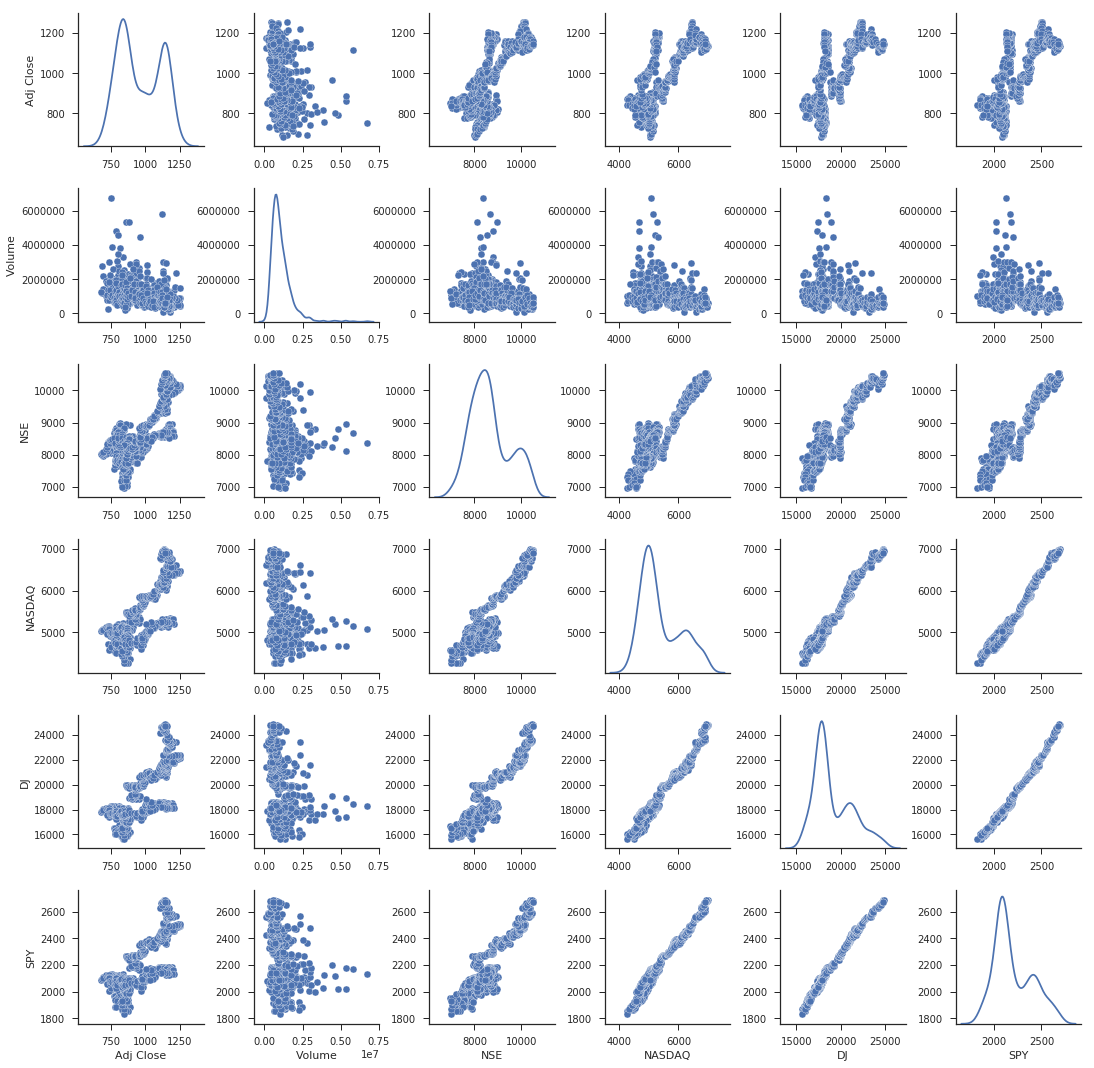

In [39]:
sns.pairplot(apsubset_df.iloc[:,0:8], diag_kind='kde')

/usr/local/anaconda/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/anaconda/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/anaconda/python3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/anaconda/python3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/anaconda/python3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: 0.0 cannot be raised to a negative power

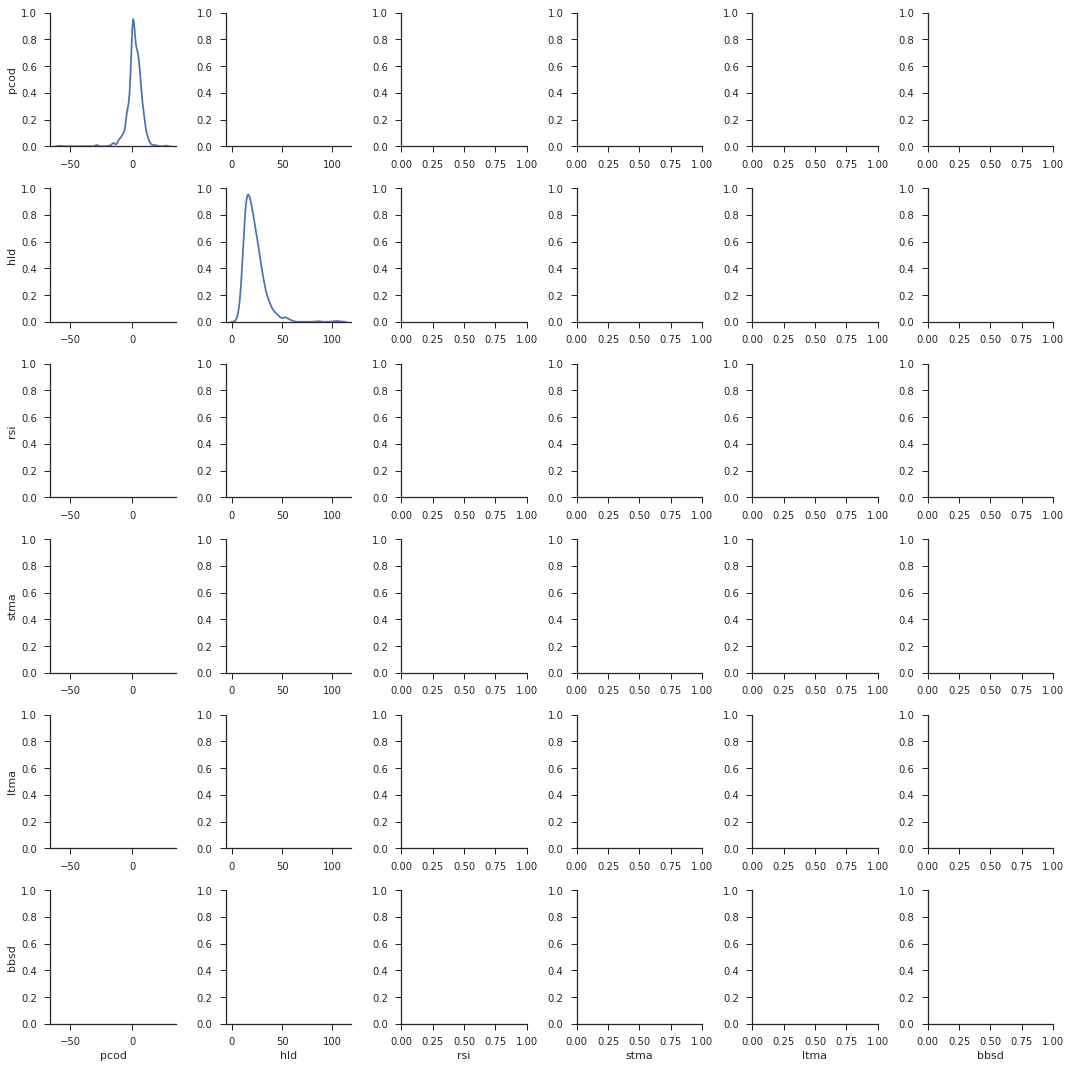

In [40]:
sns.pairplot(apsubset_df.iloc[:,8:14], diag_kind='kde')

In [43]:
apsubset_df.corr()

,ADJ_CLOSE,VOLUME,10DMA,20DMA,PCOD,HLD,21DMA,UL,LL,RSI,CROSSED_UL,CROSSED_LL,SMOL,SMBL,BUYSELL,NIFTY,NIFTY_RETURNS,RETURNS,UpperBB,LowerBB
ADJ_CLOSE,1.000000,-0.152895,0.986934,0.973542,0.032691,0.204942,0.972299,0.970754,0.951664,0.114378,0.088141,-0.109941,0.002094,-0.008438,0.009343,0.851216,0.004713,0.027753,0.971611,0.954002
VOLUME,-0.152895,1.000000,-0.130147,-0.128562,-0.116681,0.487158,-0.130363,-0.111728,-0.147346,-0.060105,0.123390,0.242972,-0.028614,0.052074,-0.008390,-0.134173,0.025535,-0.057314,-0.108648,-0.147043
10DMA,0.986934,-0.130147,1.000000,0.992865,0.006074,0.182489,0.991841,0.987321,0.973946,0.008922,0.006280,-0.047327,-0.015446,0.018199,-0.044584,0.848330,-0.016810,-0.048489,0.987945,0.976099
20DMA,0.973542,-0.128562,0.992865,1.000000,0.006233,0.146496,0.999932,0.990091,0.987554,-0.079211,-0.013696,-0.031558,-0.014116,0.023899,-0.046875,0.845698,-0.024198,-0.053023,0.990002,0.988515
PCOD,0.032691,-0.116681,0.006074,0.006233,1.000000,-0.044756,0.007725,0.006764,0.008577,0.034995,0.047327,-0.172113,0.020185,-0.067719,0.178844,-0.001443,0.221651,0.349652,0.005437,0.006947
HLD,0.204942,0.487158,0.182489,0.146496,-0.044756,1.000000,0.142878,0.174440,0.105775,0.110280,0.231654,0.132904,-0.000941,-0.000190,-0.015313,0.106645,-0.027300,0.025813,0.178370,0.109095
21DMA,0.972299,-0.130363,0.991841,0.999932,0.007725,0.142878,1.000000,0.989679,0.988136,-0.084026,-0.014993,-0.030743,-0.012761,0.022919,-0.044802,0.845451,-0.024254,-0.052740,0.989438,0.988872
UL,0.970754,-0.111728,0.987321,0.990091,0.006764,0.174440,0.989679,1.000000,0.955928,-0.053311,-0.010221,-0.039430,-0.026133,0.011495,-0.040141,0.832397,-0.027282,-0.048360,0.999834,0.957577
LL,0.951664,-0.147346,0.973946,0.987554,0.008577,0.105775,0.988136,0.955928,1.000000,-0.115018,-0.019763,-0.020729,0.001862,0.034637,-0.048771,0.840060,-0.020453,-0.056225,0.955612,0.999742
RSI,0.114378,-0.060105,0.008922,-0.079211,0.034995,0.110280,-0.084026,-0.053311,-0.115018,1.000000,0.335335,-0.275011,0.071279,-0.128702,0.183104,-0.002826,0.041640,0.247078,-0.049446,-0.109341


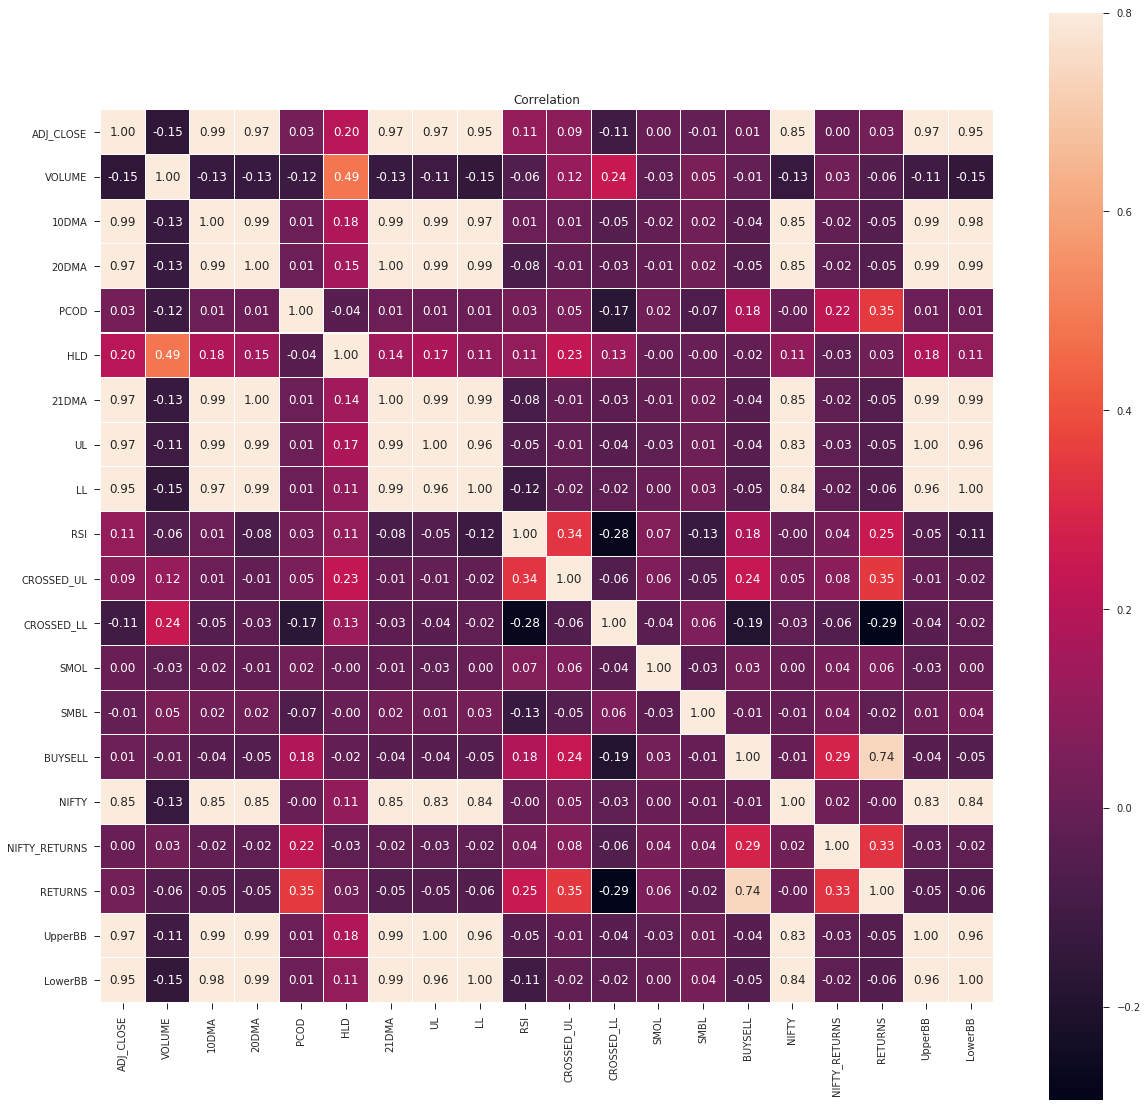

In [45]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(apsubset_df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

# Data visualization for the technical indicators:

##  bollinger bands

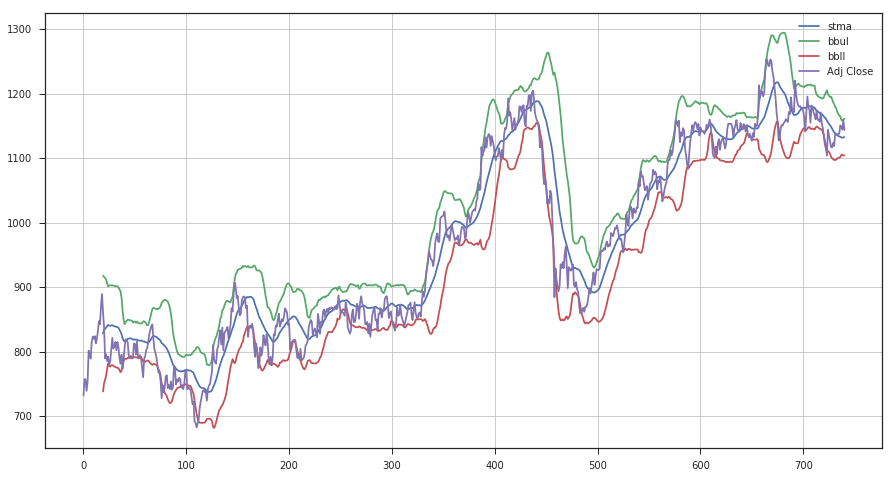

In [49]:
# Compute the Bollinger Bands 

def BBANDS(data,n):
 MA = data['Adj Close'].rolling(window=n).mean()
 SD = data['Adj Close'].rolling(window=n).std()
 data['UpperBB'] = MA + (2 * SD) 
 data['LowerBB'] = MA - (2 * SD)
 return data
 
# Compute the Bollinger Bands for AP using the n-day Moving average
n = 20
AP_BBANDS = BBANDS(apsubset_df,n)
#print(TCS_BBANDS)

# Create the plot
pd.concat([ap_df['stma'],ap_df['bbul'],ap_df['bbll'],ap_df['Adj Close']],axis=1).plot(figsize=(15,8),grid=True)

[None, None, None, None, None, None, None, None, None, None, None, None]

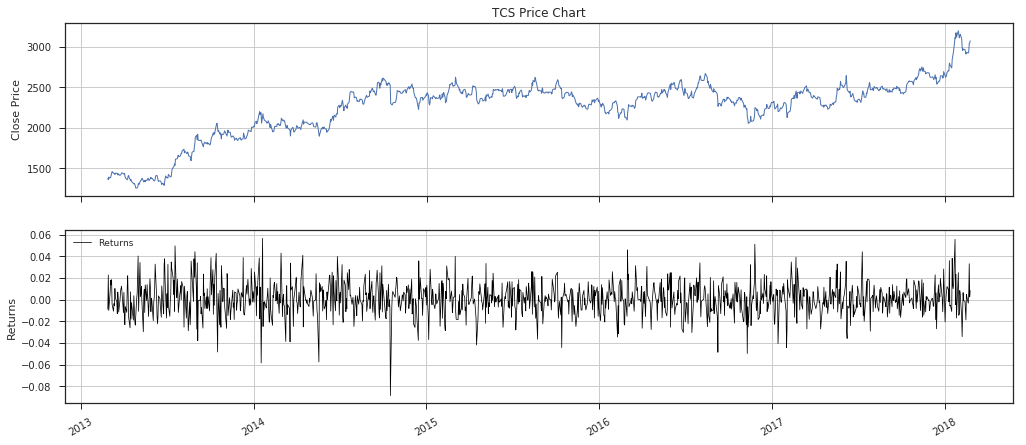

In [63]:
# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(17,7))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(tcssubset_df['ADJ_CLOSE'],lw=1)
plt.title('TCS Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(tcssubset_df['RETURNS'],'k',lw=0.75,linestyle='-',label='Returns')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('Returns')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

In [ ]:
#PLotting the Price variables against time

#Initiallize the plots
fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(111)



#plot the figures
ax1.plot(ap_df['Date'],ap_df['Adj Close'],label = 'Closing Price')
plt.plot(ap_df['stma'],label='STMA')
plt.plot(ap_df['ltma'],label='LTMA')


#ax2=fig.add_subplot(212)
#ax2.bar(ap_df['Date'],ap_df['Volume'],label='Volume')

plt.title('Price Trend Analysis')
plt.xlabel('TIME PERIOD')
plt.ylabel('STOCK PRICE')
plt.legend()
plt.show


# Initialize the pdf file
#pp = PdfPages('multipage.pdf')

# Save the figure to the file
#pp.savefig()

# Close the file
#pp.close()

## Stock Price VS STMA, LTMA and Volume

<function matplotlib.pyplot.show>

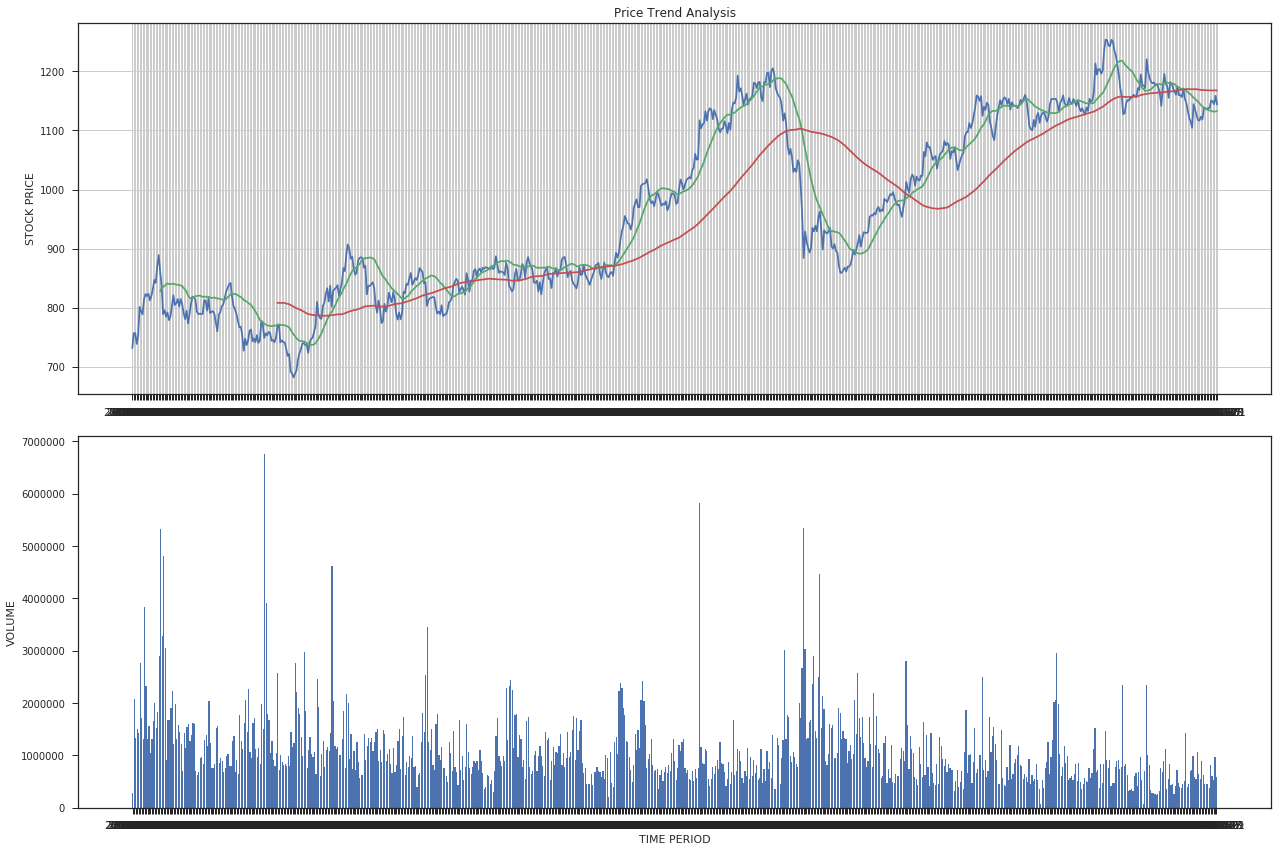

In [11]:
#PLotting the Price variables against time

#Initiallize the plots
fig=plt.figure(figsize=(18,12))
ax1=fig.add_subplot(2,1,1)
plt.title('Price Trend Analysis')
plt.ylabel('STOCK PRICE')
plt.legend()
plt.grid(True)

ax2=fig.add_subplot(2,1,2)
plt.xlabel('TIME PERIOD')
plt.ylabel('VOLUME')

#plot the figures
ax1.plot(ap_df['Date'],ap_df['Adj Close'],label = 'Closing Price')
ax1.plot(ap_df['stma'],label='STMA')
ax1.plot(ap_df['ltma'],label='LTMA')

ax2.bar(ap_df['Date'],ap_df['Volume'],label='Volume')

#Show the plot
fig.tight_layout()
plt.show

#  Interactive Visuals using BOKEH

In [54]:
# prepare some data
#ap = ColumnDataSource(ap_df)

ap_close = np.array(ap_df['Adj Close'])
ap_dates = np.array(ap_df['Date'], dtype=np.datetime64)

#window_size = 30
#window = np.ones(window_size)/float(window_size)
#aapl_avg = np.convolve(aapl, window, 'same')

# output to static HTML file
output_file("stocks.html", title="stocks.py example")

#output_notebook()


TOOLS = [BoxSelectTool(), HoverTool()]

#hover = HoverTool(tooltips=[
 #     ("Date =", "@Date"),
  #  ("Price =", "$x")
#],
#formatters={
 #       'Date'  : 'datetime', # use 'datetime' formatter for 'date' field
  #      'Price' : 'printf',   # use 'printf' formatter for 'adj close' field
   #                               # use default 'numeral' formatter for other fields
   # }
                 
    #             )

# create a new plot with a a datetime axis type
p = figure(width=900, height=500, x_axis_type="datetime")

# add renderers
p.line(ap_dates,ap_close,line_color='red',legend='close')
p.line(ap_dates, ap_df['stma'], color='navy', line_width=2,legend='STMA')
p.line(ap_dates, ap_df['ltma'], color='green', line_width=2,legend='LTMA')

#p.add_tools(hover)


# NEW: customize by setting attributes
p.title.text = "AP One-Month Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.ygrid.band_fill_color="olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
output_file("stocks.html", title="stocks.py example", mode='inline')
save(p)

'/mnt/home/s.anbum_gmail/stocks.html'

# plot the daily returns over time, along with dr of NSE and the beta values

In [ ]:
# Bollinger bands

# Normalize the data for prediction: